# Simple Linear Regression Model

Source of data: https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html
This notebook will use Gradient Descent Algorithm to find the minimum cost/loss function. Minimum cost function helps to set the parameter \theta for linear regression hypothesis function

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
cricket_chimps_temp_df = pd.read_csv('/Users/kamal/GoogleDrive/Machine_Learning_Practice_Python/Machine_Learning_Practice_Python/data/cricket_chimps_temp.csv')

In [45]:
cricket_chimps_temp_df.head()

,X,Y
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998


In [85]:
cricket_chimps_temp_df.describe()

,X,Y
count,15.000000,15.000000
mean,16.653333,80.040000
std,1.702044,6.707332
min,14.400000,69.400002
25%,15.450000,75.750000
50%,16.200001,80.599998
75%,17.150001,83.400002
max,20.000000,93.300003


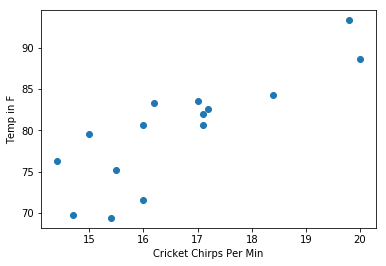

In [50]:
# plot the data
X = cricket_chimps_temp_df['X'].values
y = cricket_chimps_temp_df['Y'].values
plt.scatter(X, y)
plt.xlabel('Cricket Chirps Per Min')
plt.ylabel('Temp in F')
plt.show()

**The above plot shows positive correlation of Cricket (insect) chirps with temperature**

## Use Gradient Descent Algorithm

In [63]:
theta_0 = 0
theta_1 = 0
feature = X
actual_label = y
alpha = 0.001 # hyperparameter learning rate
no_obs = len(X)

while True:
    sum_theta_0 = theta_0 + theta_1 * feature - actual_label
    sum_theta_1 = (theta_0 + theta_1 * feature - actual_label) * feature
    
    temp_0 = theta_0 - alpha * 1/no_obs * sum_theta_0
    temp_1 = theta_1 - alpha * 1/no_obs * sum_theta_1
    
    if abs(temp_0 - theta_0) < 0.001:
        break;
    
    theta_0 = temp_0
    theta_1 = temp_1

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
print(theta_0, theta_1)

In [41]:
print(theta_0, theta_1)

0.8003999989666665 13.418313335082665


In [37]:
def predicted_label(theta_0, theta_1, x):
    return theta_0 + theta_1 * x

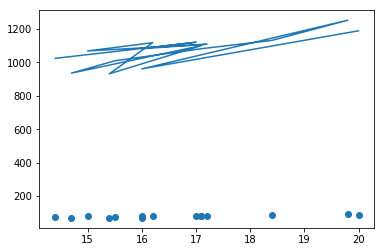

In [39]:
# plot the data based on new predicted value
X = cricket_chimps_temp_df['X'].values
y = cricket_chimps_temp_df['Y'].values
plt.scatter(X, y)
plt.plot(X, predicted_label(theta_0, theta_1, y))
plt.show()

## Simple Linear Regression using Scikit Learn - Popular opensourced ML Framework

In [54]:
from sklearn.linear_model import LinearRegression

In [76]:
# reshape the one feature into column-wise
X = X.T

reg = LinearRegression()
reg.fit(X, y)

reg.score(X, y)

0.69746514501674

In [80]:
predicted_label = reg.predict(np.array([[20.000]]))
predicted_label

array([91.05419634])

In [82]:
# Estimated coefficients for the linear regression problem
reg.coef_

array([3.29109457])

## Simple Linear Regression using Tensorflow

In [84]:
import tensorflow as tf

In [ ]:
classifier = tf.estimator.LinearRegressor()